# Machine Learning Algorithms on Bank DataSet 

## About Dataset 

### Context 

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### Content

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. 

### Detailed Column Descriptions 

<ul>
<li>age: (numeric)</li>
<li>job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"))</li>
<li>marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
<li>education:(categorical: "unknown","secondary","primary","tertiary")</li>
<li>default: has credit in default? (binary: "yes","no")</li>
<li>balance: average yearly balance, in euros (numeric)</li>
<li>housing: has housing loan? (binary: "yes","no")</li>
<li>loan: has personal loan? (binary: "yes","no")</li>
<li>contact: contact communication type (categorical: "unknown","telephone","cellular")</li>
<li>day: last contact day of the month (numeric)</li>
<li>month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")</li>
<li>duration: last contact duration, in seconds (numeric)</li>
<li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric)</li>
<li> poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
</ul>

### Output variable (desired target): 

y: has the client subscribed a term deposit? (binary: "yes","no")

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('bank.csv', sep=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory Data Analysis 

### Shape of Dataset

In [4]:
np.shape(df)

(45211, 17)

### Columns

In [5]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

### Seperating Categorical columns & Numerical columns

In [6]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Variables:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


### Drawing histogram & box plot on numerical columns & colculating skewness

age
Skew : 0.68


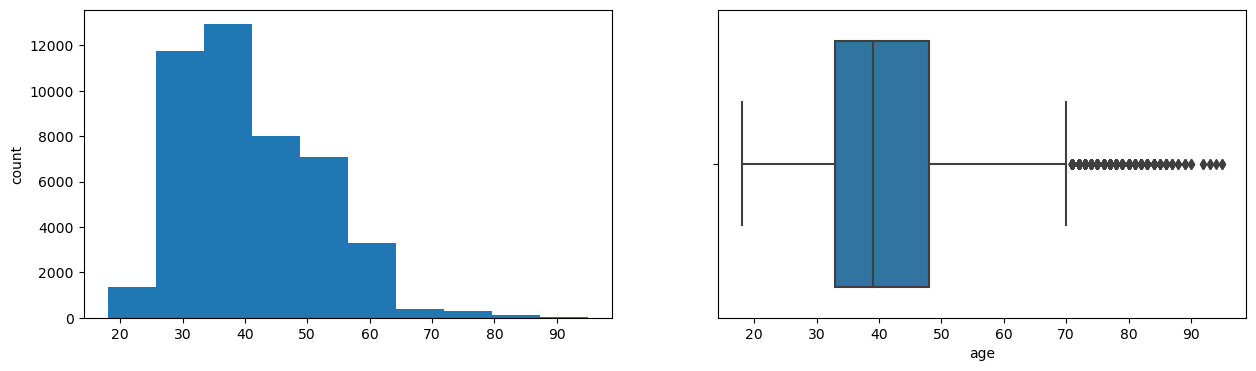

balance
Skew : 8.36


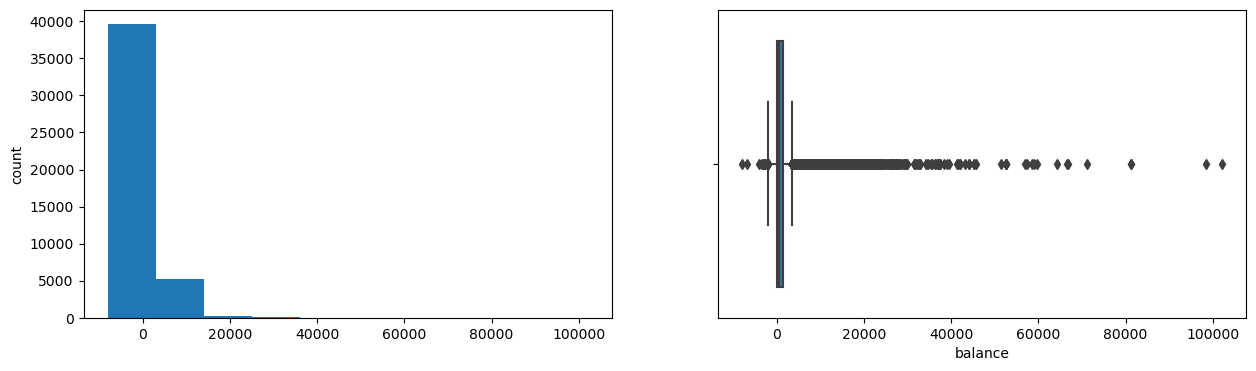

day
Skew : 0.09


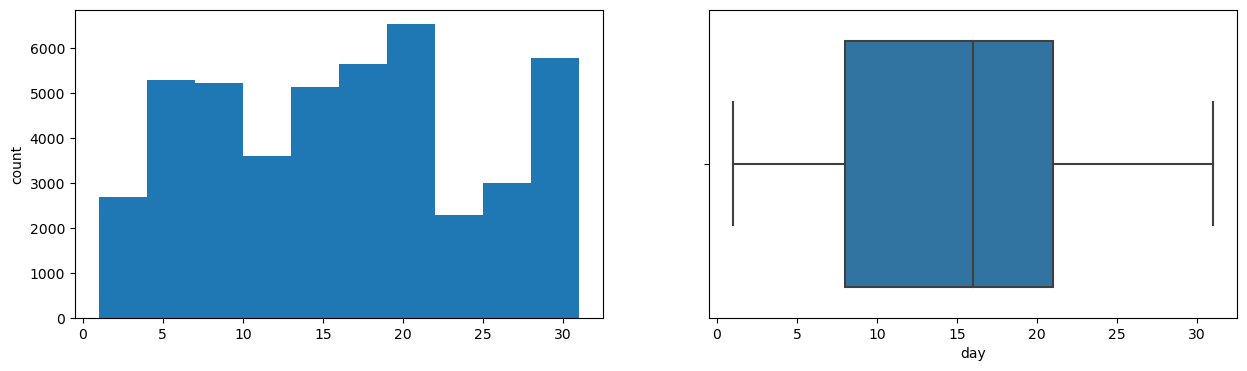

duration
Skew : 3.14


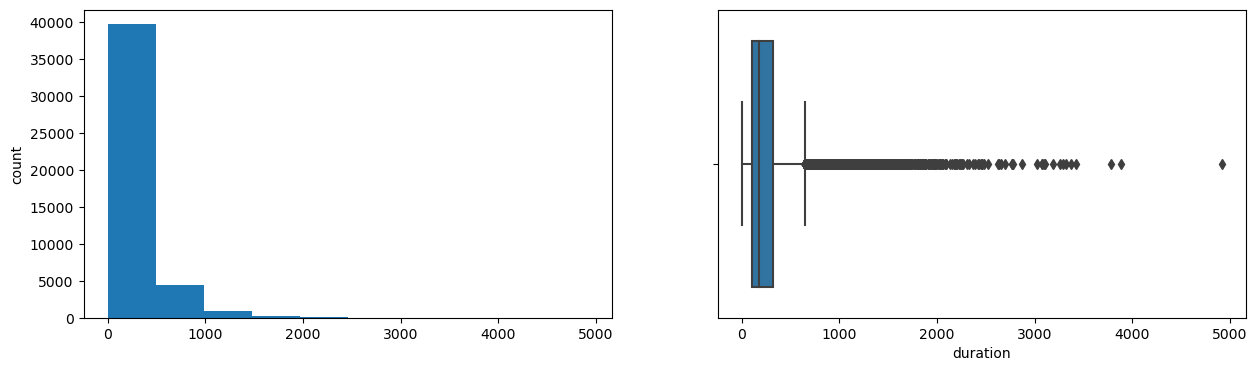

campaign
Skew : 4.9


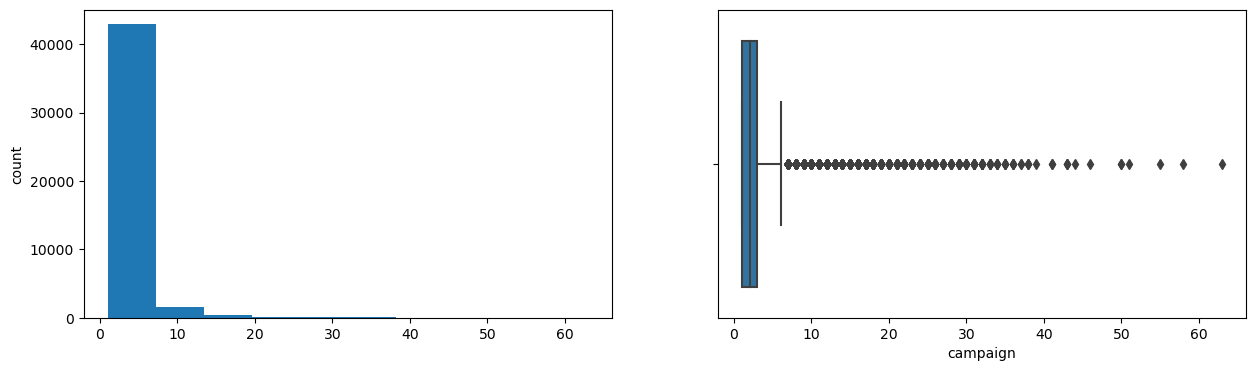

pdays
Skew : 2.62


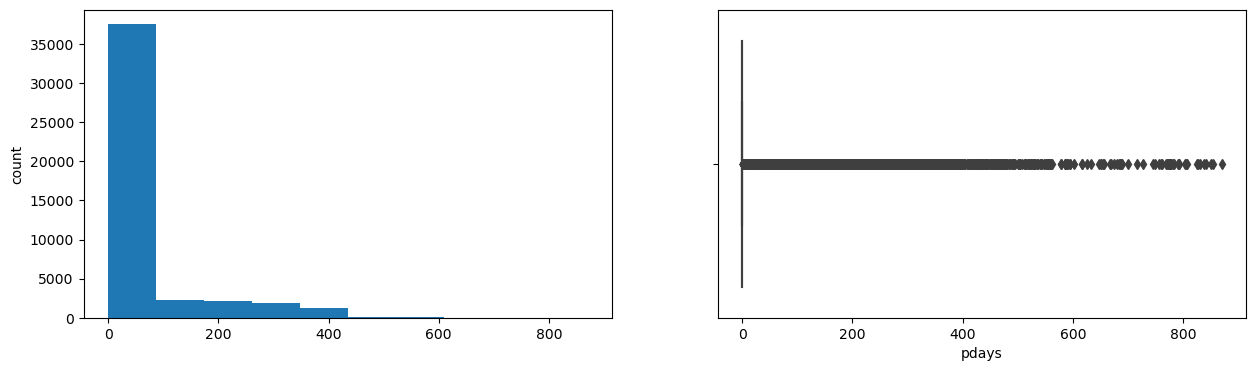

previous
Skew : 41.85


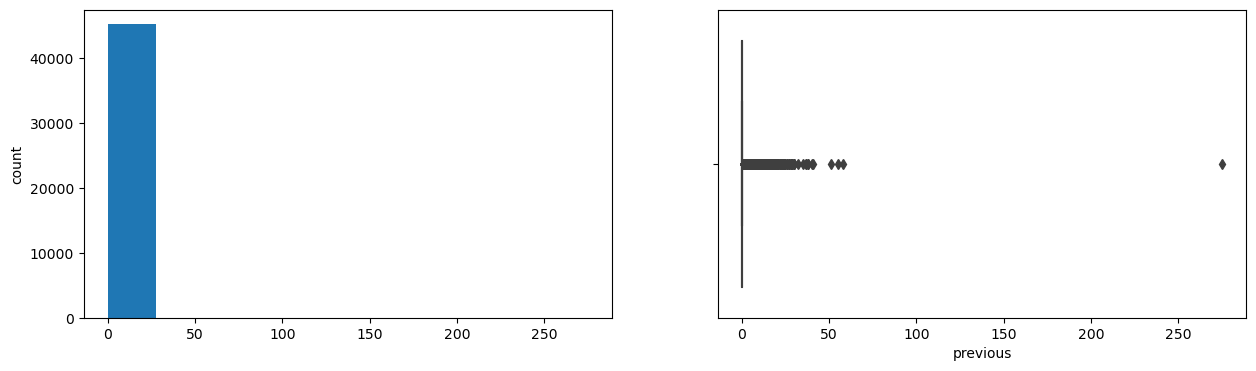

In [7]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### All information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Numeric columns statistics  transposed table

In [9]:
df.describe(include="int64").T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Categorical columns statistics transposed table

In [10]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### Number of unique values in all columns

In [11]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Percentage of balance & duration columns have values less than 1000 with dropping  missing values

In [12]:
print(len(df[['balance', 'duration']].apply(lambda x: x[x < 1000]).dropna()) / len(df) * 100, "%")

66.15425449558737 %


### Percentage of age column have values greater than 18 with dropping missing values

In [13]:
print(len(df[['age']].apply(lambda x: x[x > 18]).dropna()) / len(df) * 100, "%")

99.9734577868218 %


### Counts of unique values in job column

In [14]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Counts of unique values in marital column

In [15]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

### Counts of unique values in education column

In [16]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Counts of unique values in default column

In [17]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

### Counts of unique values in housing column

In [18]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Counts of unique values in loan column

In [19]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### Counts of unique values in contact column

In [20]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

### Counts of unique values in month column

In [21]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

###  Counts of unique values in poutcome column

In [22]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Counts of unique values in y column

In [23]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Percentage of unique values in y column

In [24]:
df["y"].value_counts(normalize = True) * 100

no     88.30152
yes    11.69848
Name: y, dtype: float64

### Count plot on y column

<Axes: xlabel='y', ylabel='count'>

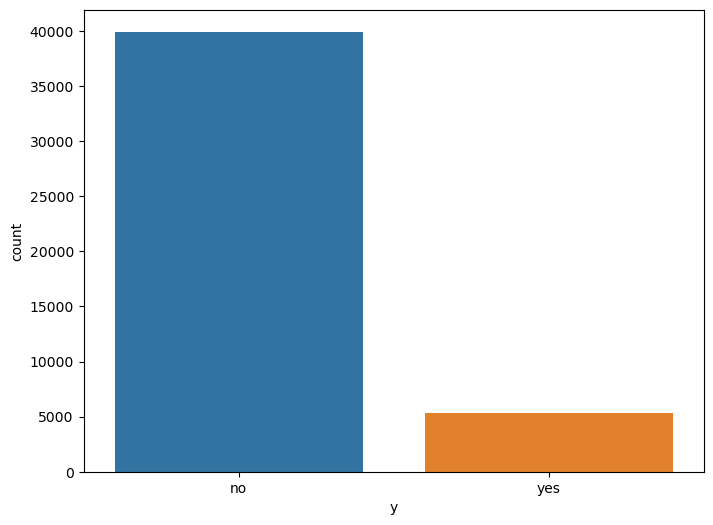

In [25]:
sns.countplot(x='y', data=df, label='Count')

### Sorting Dataset values by balance column in descending order

In [26]:
df.sort_values(by = "balance", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


### Sorting Dataset values by age column in ascending order

In [27]:
df.sort_values(by = "age", ascending = True).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42954,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
41273,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
42146,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
43637,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
40736,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no


### Correlation of all numeric columns

In [28]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Grouping by y values on all numeric columns

In [29]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


### Cross table on marital & education columns & normalizing values

In [30]:
pd.crosstab(df["marital"], df["education"], normalize = 'index')

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,0.144421,0.540618,0.282504,0.032456
married,0.192768,0.505990,0.258617,0.042625
single,0.066693,0.517357,0.374668,0.041282


### Cross table on job & poutcome columns & normalizing values

In [31]:
pd.crosstab(df["job"], df["poutcome"], normalize = 'index')

poutcome,failure,other,success,unknown
job,,,,
admin.,0.124347,0.046606,0.039451,0.789596
blue-collar,0.109741,0.041204,0.015208,0.833847
entrepreneur,0.110289,0.026227,0.014795,0.848689
housemaid,0.078226,0.020968,0.023387,0.877419
management,0.110383,0.041552,0.040918,0.807147
retired,0.101590,0.036661,0.076855,0.784894
self-employed,0.104497,0.038632,0.034832,0.822039
services,0.106885,0.042610,0.020462,0.830043
student,0.124733,0.086354,0.092751,0.696162


### Pivot table on age & balance & duration columns seperating by job values using mean & count aggregation function

In [32]:
df.pivot_table(
    ["age", "balance", "duration"],
    ["job"],
    aggfunc = ["mean", "count"],
)

mean                          count                 
                     age      balance    duration   age balance duration
job                                                                     
admin.         39.289886  1135.838909  246.896732  5171    5171     5171
blue-collar    40.044081  1078.826654  262.901562  9732    9732     9732
entrepreneur   42.190989  1521.470074  256.309348  1487    1487     1487
housemaid      46.415323  1392.395161  245.825000  1240    1240     1240
management     40.449567  1763.616832  253.995771  9458    9458     9458
retired        61.626767  1984.215106  287.361307  2264    2264     2264
self-employed  40.484484  1647.970868  268.157061  1579    1579     1579
services       38.740250   997.088108  259.318729  4154    4154     4154
student        26.542644  1388.060768  246.656716   938     938      938
technician     39.314598  1252.632092  252.904962  7597    7597     7597
unemployed     40.961627  1521.745971  288.543361  1303    1303     1303
unknown        47.593750  1772.357639  237.611111   288     288      288

### Drawing histogram plot on balance column 

<Axes: >

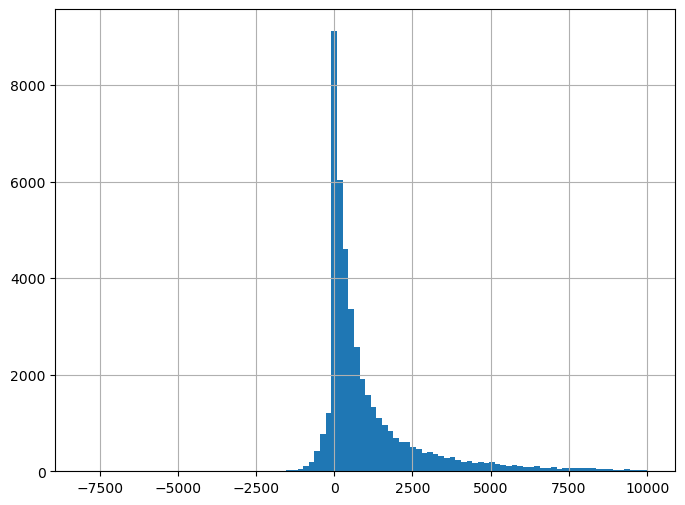

In [33]:
df['balance'][df['balance'] < 10000].hist(bins=100)

### Drawing distribution plot on y column seperating by it's values

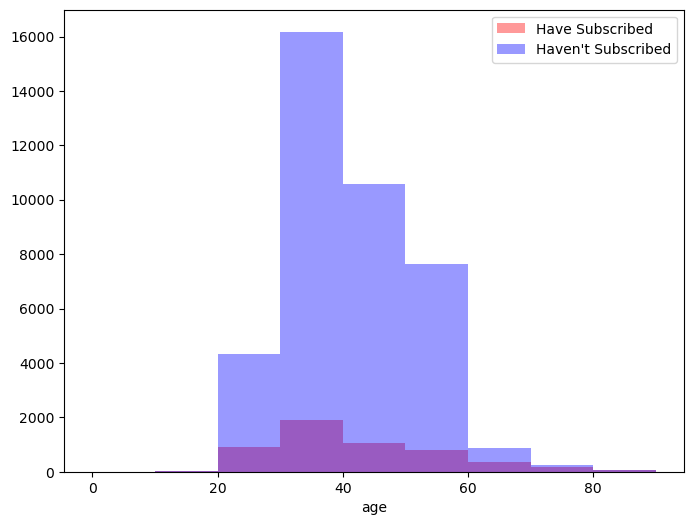

In [34]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

### Count plot for all categorical variables in the dataset

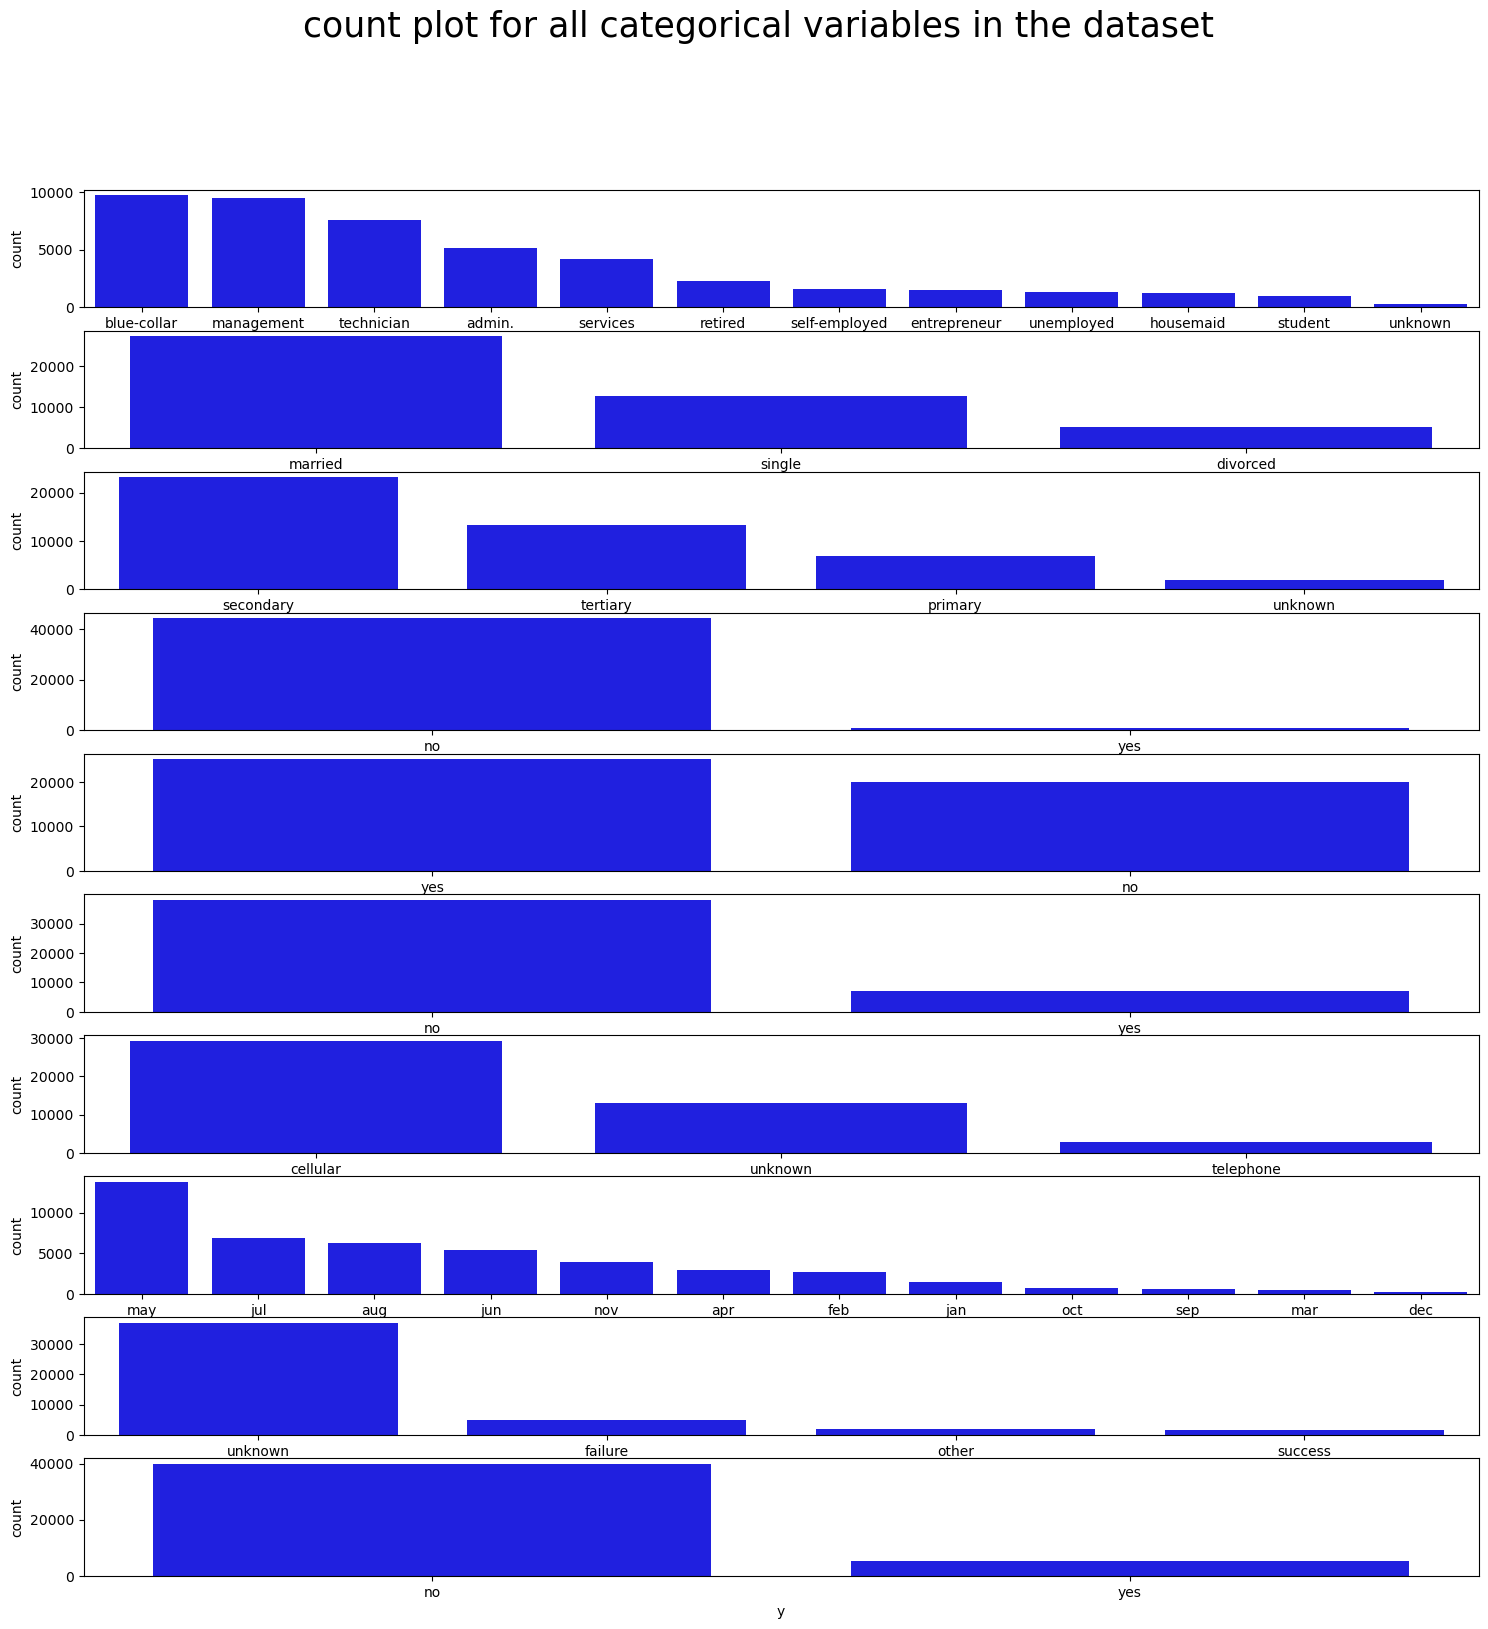

In [35]:
fig, axes = plt.subplots(10, 1, figsize = (18, 18))
fig.suptitle('count plot for all categorical variables in the dataset', fontsize=25)
sns.countplot(ax = axes[0], x = 'job', data = df, color = 'blue', 
              order = df['job'].value_counts().index);
sns.countplot(ax = axes[1], x = 'marital', data = df, color = 'blue', 
              order = df['marital'].value_counts().index);
sns.countplot(ax = axes[2], x = 'education', data = df, color = 'blue', 
              order = df['education'].value_counts().index);
sns.countplot(ax = axes[3], x = 'default', data = df, color = 'blue', 
              order = df['default'].value_counts().index);
sns.countplot(ax = axes[4], x = 'housing', data = df, color = 'blue', 
              order = df['housing'].value_counts().index);
sns.countplot(ax = axes[5], x = 'loan', data = df, color = 'blue', 
              order = df['loan'].value_counts().index);
sns.countplot(ax = axes[6], x = 'contact', data = df, color = 'blue', 
              order = df['contact'].value_counts().index);
sns.countplot(ax = axes[7], x = 'month', data = df, color = 'blue', 
              order = df['month'].value_counts().index);
sns.countplot(ax = axes[8], x = 'poutcome', data = df, color = 'blue', 
              order = df['poutcome'].value_counts().index);
sns.countplot(ax = axes[9], x = 'y', data = df, color = 'blue', 
              order = df['y'].value_counts().index);

### Scatter plot matrix on age & balance & duration using kde plot on main diagonal

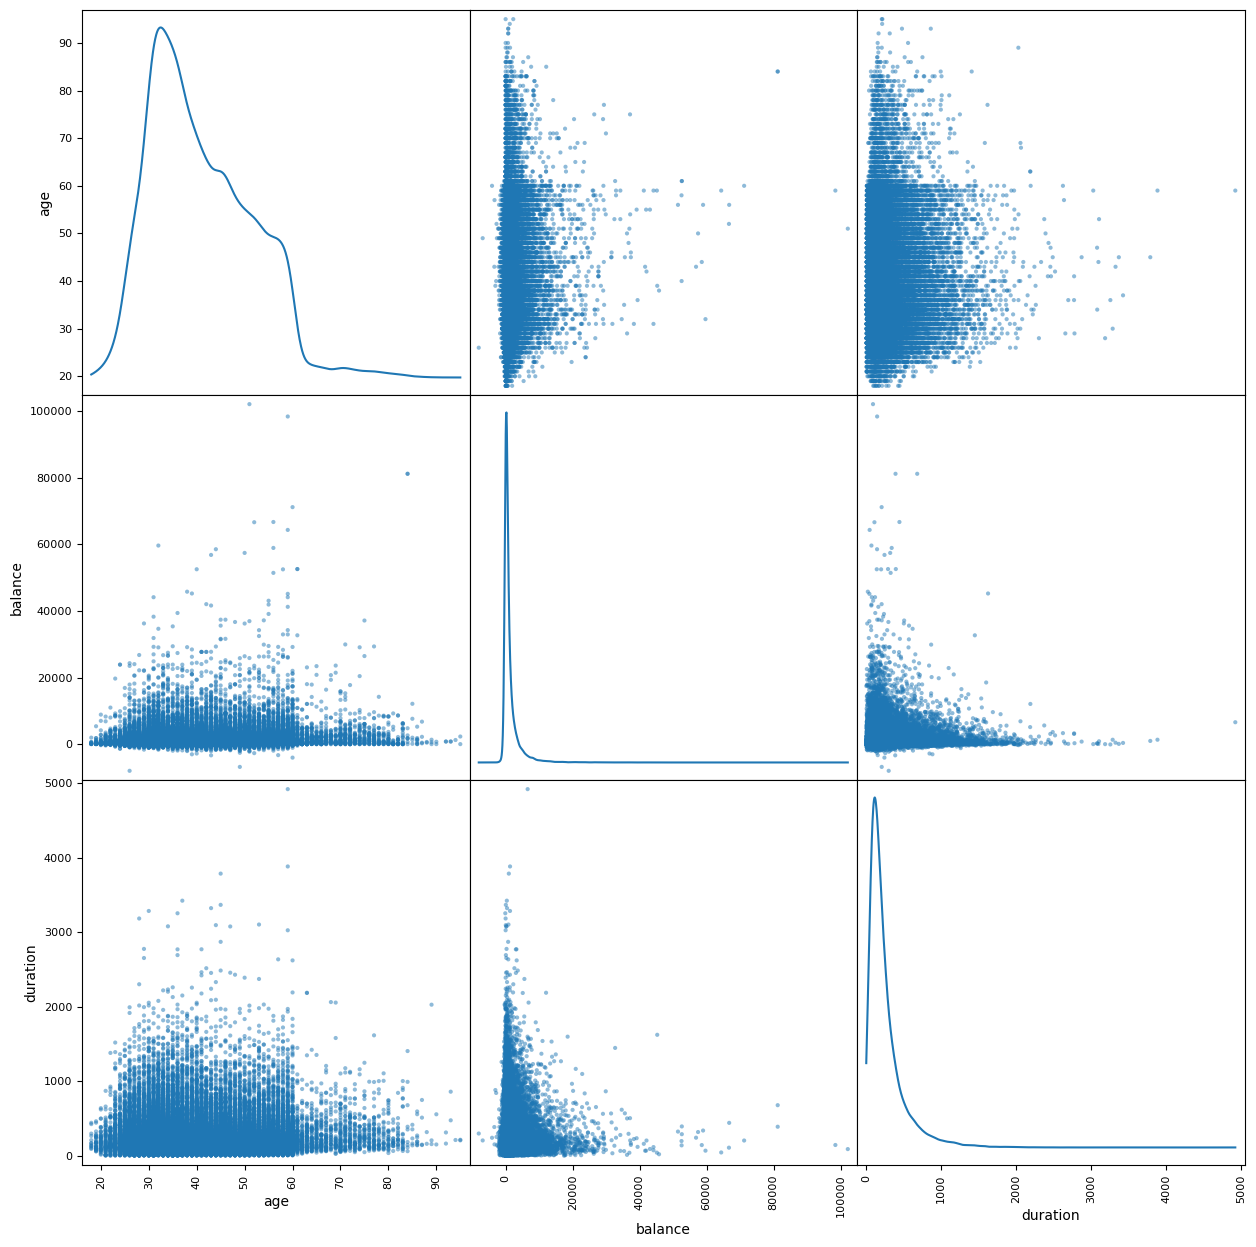

In [36]:
pd.plotting.scatter_matrix(
    df[["age", "balance", "duration"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

### Box plot on age seperating by marital values

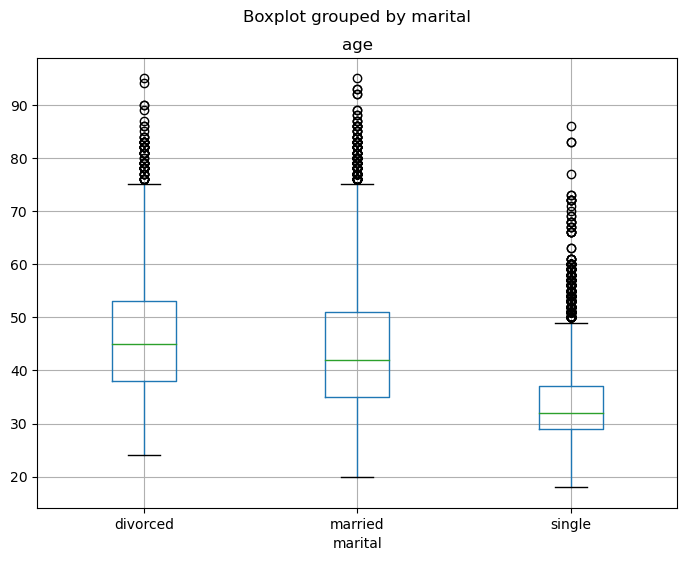

In [37]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

### Box plot on age seperating by job values

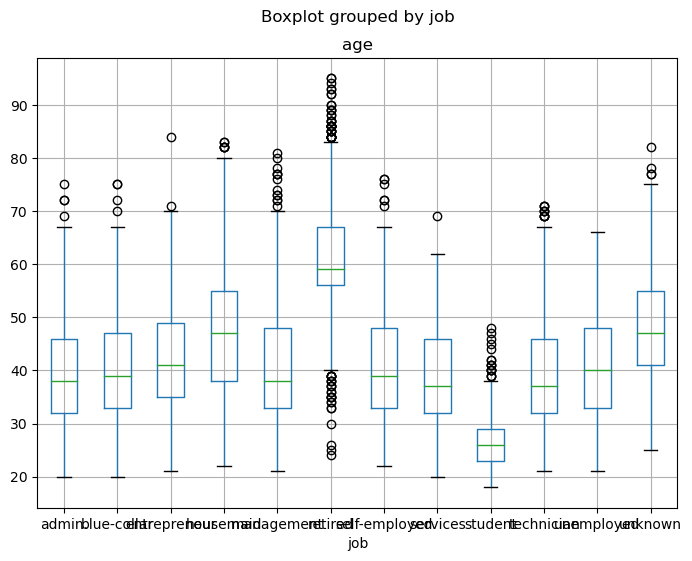

In [38]:
df.boxplot(column = "age",
           by = "job")
plt.show()

### Box plot on age seperating by education values

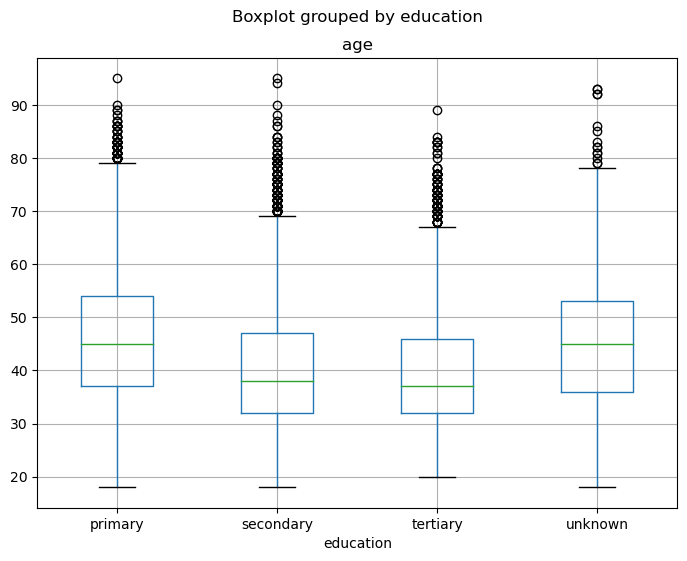

In [39]:
df.boxplot(column = "age",
           by = "education")
plt.show()

### Box plot on age seperating by contact values

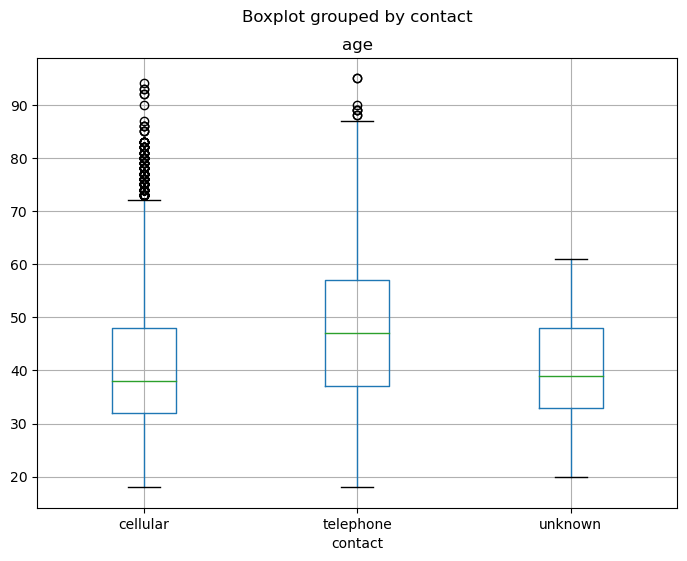

In [40]:
df.boxplot(column = "age",
           by = "contact")
plt.show()

### Box plot on balance seperating by marital values

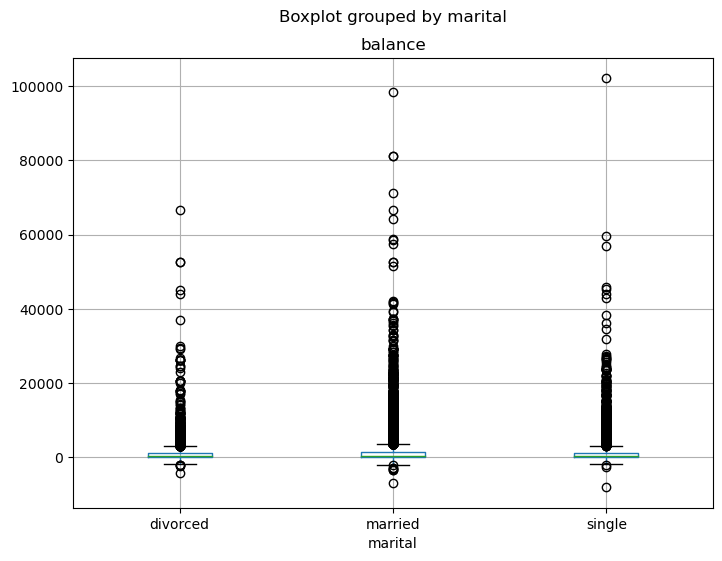

In [41]:
df.boxplot(column = "balance",
           by = "marital")
plt.show()

### Box plot on balance seperating by education values

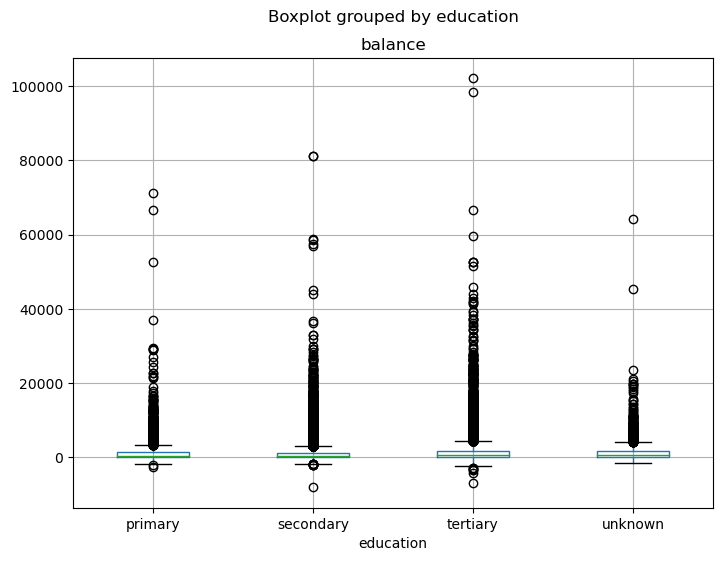

In [42]:
df.boxplot(column = "balance",
           by = "education")
plt.show()

### Cross table on job & education columns 

In [43]:
df_cross = pd.crosstab(df["job"], df["education"]).copy()
print(df_cross)

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127


### Heatmap on above cross table

Text(0.5, 25.722222222222214, 'destination_location')

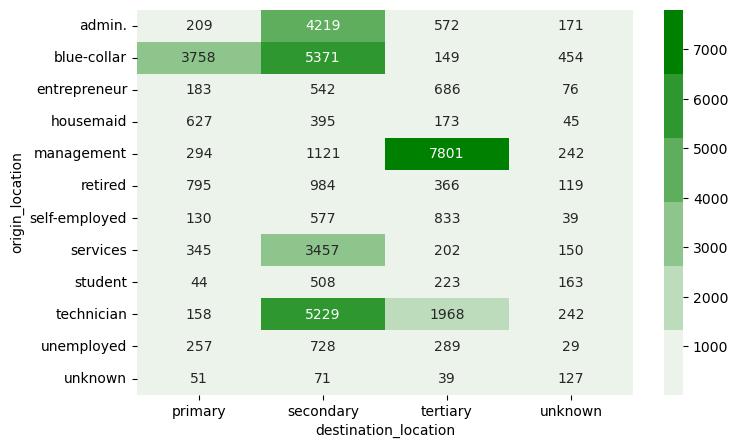

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
custom_cmap_2 = sns.light_palette("green", as_cmap=False)
sns.heatmap(df_cross, annot=True, fmt='.0f', cmap=custom_cmap_2, ax=ax)
ax.set_ylabel('origin_location')
ax.set_xlabel('destination_location')

### Heatmap on correlation of numeric columns

<Axes: >

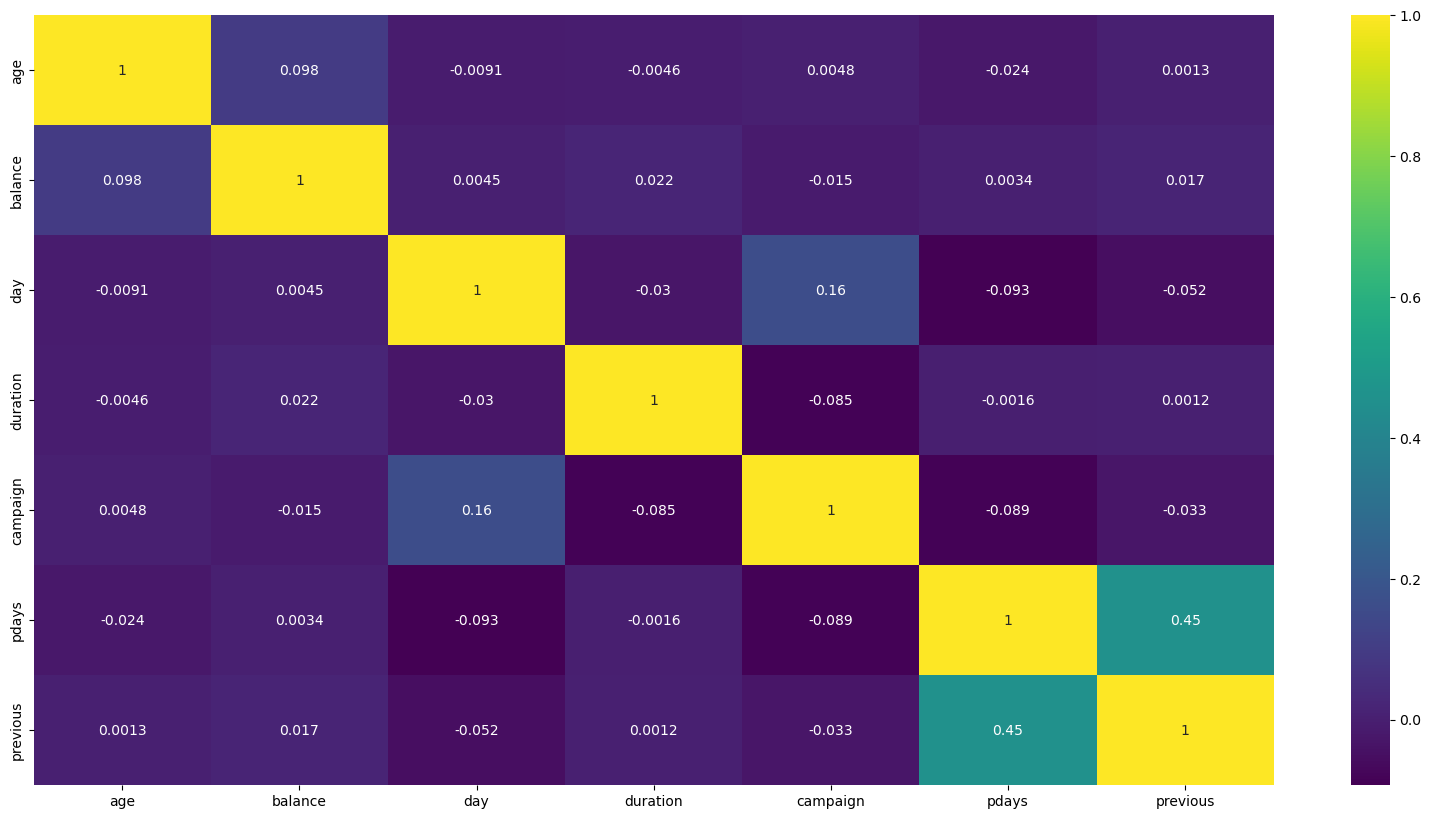

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

### Pie chart on all categorical columns

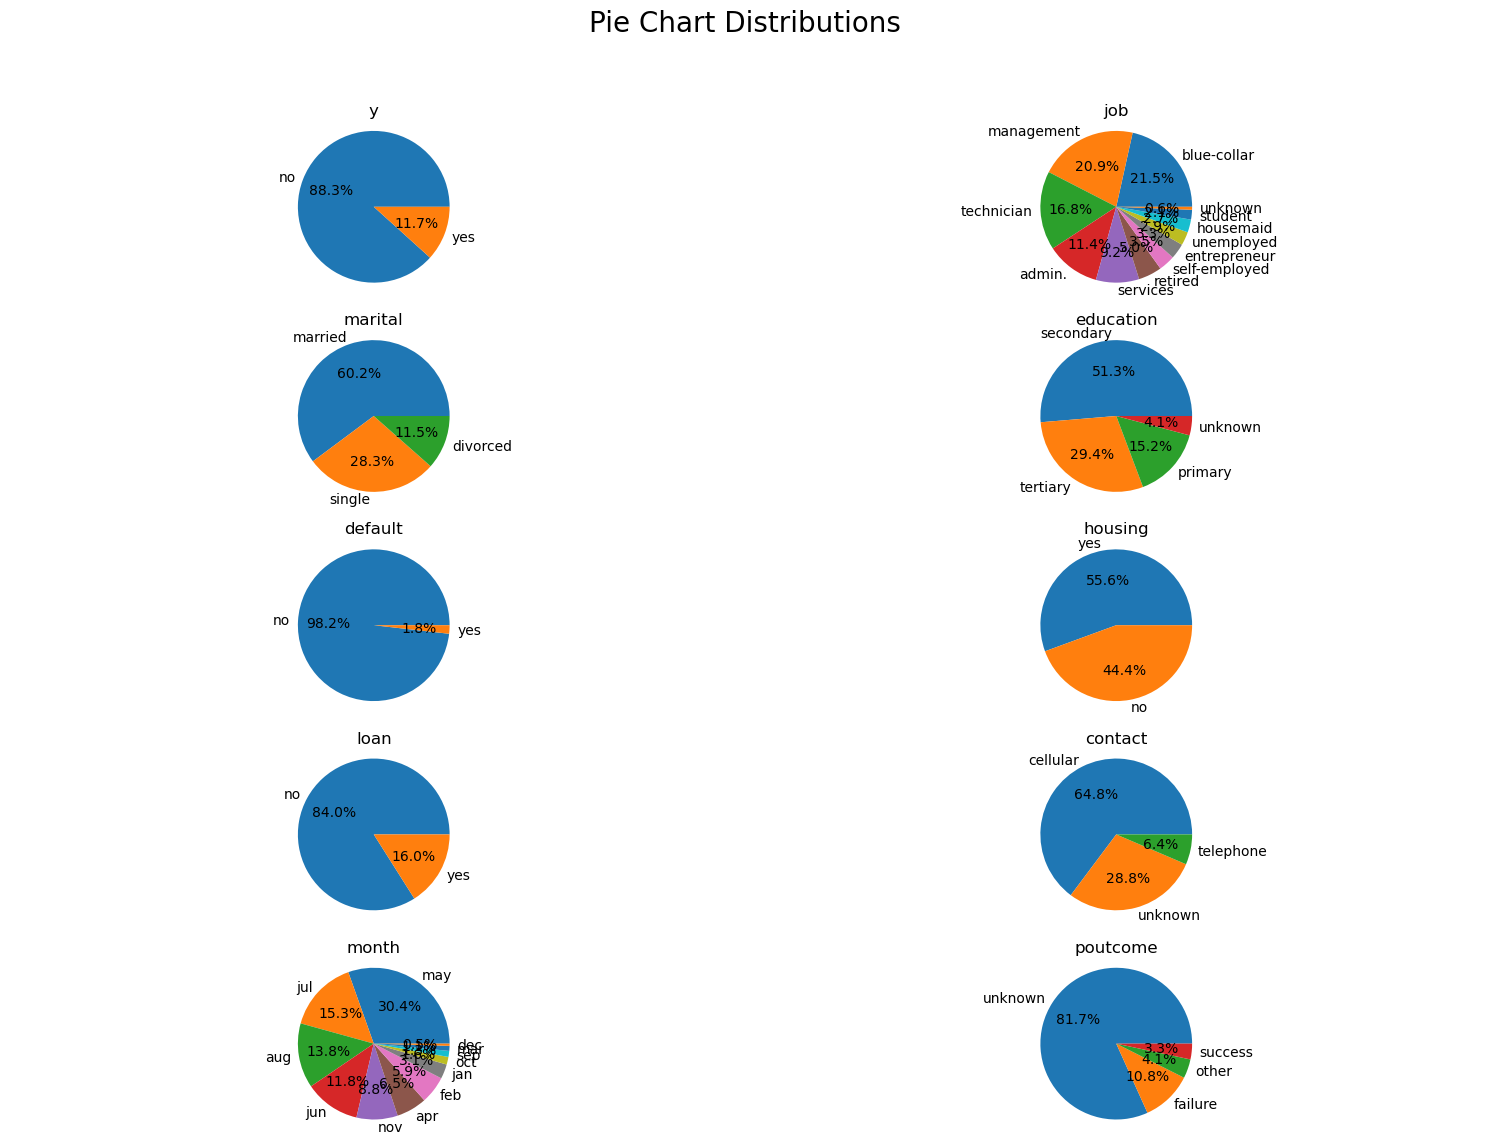

In [46]:
df2 = df[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(5, 2, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Preproccesing

### IQR technique for removing outliers

In [47]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range

### Box plot on age column

<Axes: xlabel='age'>

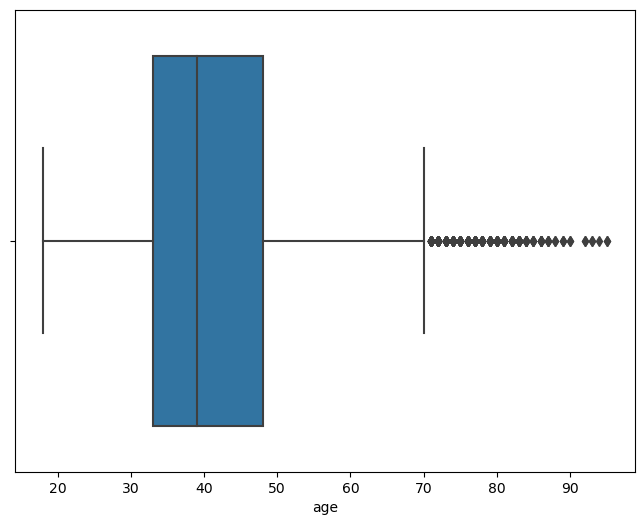

In [48]:
sns.boxplot(x=df['age'])

### Removing outliers on age column Using IQR

In [49]:
lower_bound,upper_bound = iqr_technique(df['age'])
df = df[(df.age>lower_bound) & (df.age < upper_bound)].copy()

### Box plot on age after removing outliers

<Axes: xlabel='age'>

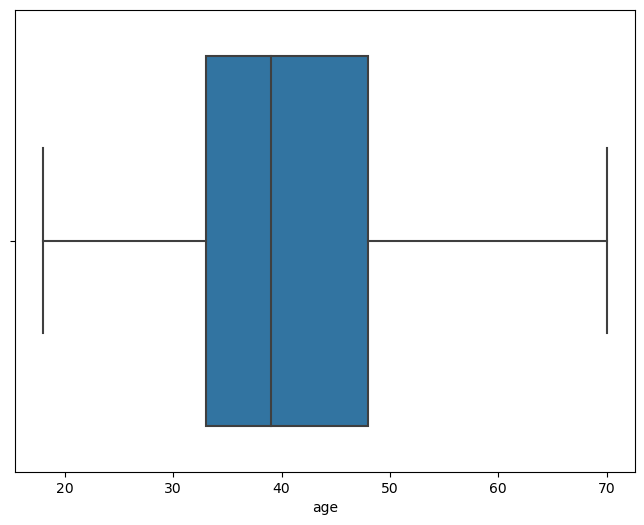

In [50]:
sns.boxplot(x=df['age'])

### Summation of Null values in all columns

In [51]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Summation of Missing values in all columns

In [52]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Removing all missing values in Dataset

In [53]:
df.dropna(inplace=True)

### Removing all duplicate values in Dataset

In [54]:
df.drop_duplicates(inplace=True)

### Number of negative records on balance column

In [56]:
len(df[df['balance'] < 0])

3766

### Replacing negative values of balance by mean value of this column

In [57]:
df['balance'] = df['balance'].apply(lambda x: x if x >= 0 else df['balance'].mean()).copy()

### Replacing -1 values of pdays column by 0 value 

In [58]:
df.replace({'pdays': {-1 : 0}}, inplace=True)

### Number of negative records on age column

In [59]:
len(df[df['age'] < 0])

0

### Number of negative records on day column

In [60]:
len(df[df['day'] < 0])

0

### Number of negative records on duration column

In [61]:
len(df[df['duration'] < 0])

0

### Number of negative records on campaign column

In [62]:
len(df[df['campaign'] < 0])

0

### Replacing binary values of default & housing & loan & y column by 0 & 1 value

In [63]:
df.replace({'default': {'yes': 1, 'no': 0}}, inplace=True)
df.replace({'housing': {'yes': 1, 'no': 0}}, inplace=True)
df.replace({'loan': {'yes': 1, 'no': 0}}, inplace=True)
df.replace({'y': {'yes': 1, 'no': 0}}, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5,may,198,1,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,0,113.0,0,0,cellular,17,nov,266,1,0,0,unknown,1
45205,25,technician,single,secondary,0,505.0,0,1,cellular,17,nov,386,2,0,0,unknown,1
45206,51,technician,married,tertiary,0,825.0,0,0,cellular,17,nov,977,3,0,0,unknown,1
45209,57,blue-collar,married,secondary,0,668.0,0,0,telephone,17,nov,508,4,0,0,unknown,0


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
categorical_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
    
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,198,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,8,2,2,0,113.0,0,0,0,17,9,266,1,0,0,3,1
45205,25,9,2,1,0,505.0,0,1,0,17,9,386,2,0,0,3,1
45206,51,9,1,2,0,825.0,0,0,0,17,9,977,3,0,0,3,1
45209,57,1,1,1,0,668.0,0,0,1,17,9,508,4,0,0,3,0


In [66]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
data

array([[0.76923077, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28846154, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63461538, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.36538462, 0.18181818, 0.5       , ..., 0.21584386, 0.04      ,
        0.33333333]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1837)

In [68]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33543, 16) (11181, 16) (33543,) (11181,)


In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                         Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Lasso)    0.8967   0.617954  0.233438  0.338867


In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                             Model  Accuracy  Precision    Recall  F1 Score
0  K-Nearest Neighbors (minkowski)  0.893301   0.571977  0.235016  0.333147


In [71]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                    Model  Accuracy  Precision   Recall  F1 Score
0  Naive Bayes (Gaussian)  0.844558   0.354938  0.45347  0.398199


In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

           Model  Accuracy  Precision   Recall  F1 Score
0  Decision Tree  0.875235    0.45193  0.47082  0.461182


In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                        Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Gini (n=100)   0.91262    0.68256  0.429022  0.526877


In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                        Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Gini (n=200)  0.913246   0.682152  0.440063  0.534995


In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                        Model  Accuracy  Precision   Recall  F1 Score
0  Random Forest Gini (n=300)  0.913067   0.682716  0.43612  0.532243


In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Entropy (n=100)  0.910205   0.664179  0.421136  0.515444


In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Entropy (n=200)  0.911367   0.672478  0.425868  0.521487


In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Entropy (n=300)  0.912441   0.680851  0.429022  0.526367


In [79]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

       Model  Accuracy  Precision    Recall  F1 Score
0  SVM (RBF)  0.886504   0.461538  0.004732  0.009368


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingClassifier(n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                               Model  Accuracy  Precision    Recall  F1 Score
0  GradientBoostingClassifier(n=100)  0.906806   0.644872  0.396688  0.491211


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
max_depth=1, random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingClassifier(n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                               Model  Accuracy  Precision    Recall  F1 Score
0  GradientBoostingClassifier(n=200)  0.908595   0.656091  0.407729  0.502918


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,
max_depth=1, random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingClassifier(n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                               Model  Accuracy  Precision    Recall  F1 Score
0  GradientBoostingClassifier(n=300)   0.90931   0.659148  0.414826  0.509197


In [83]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoostClassifier(n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                       Model  Accuracy  Precision    Recall  F1 Score
0  AdaBoostClassifier(n=100)  0.902603   0.629898  0.342271  0.443536


In [84]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=200, algorithm="SAMME", random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoostClassifier(n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                       Model  Accuracy  Precision    Recall  F1 Score
0  AdaBoostClassifier(n=200)  0.904302   0.636364  0.364353   0.46339


In [85]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=300, algorithm="SAMME", random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoostClassifier(n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

                       Model  Accuracy  Precision    Recall  F1 Score
0  AdaBoostClassifier(n=300)  0.905644   0.644898  0.373817   0.47329


In [86]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'sigmoid', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (sigmoid)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)
results = results.append(model_results, ignore_index = True)

           Model  Accuracy  Precision   Recall  F1 Score
0  SVM (sigmoid)  0.812807   0.158809  0.15142  0.155026


In [87]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.896700,0.617954,0.233438,0.338867
1,K-Nearest Neighbors (minkowski),0.893301,0.571977,0.235016,0.333147
2,Naive Bayes (Gaussian),0.844558,0.354938,0.453470,0.398199
3,Decision Tree,0.875235,0.451930,0.470820,0.461182
4,Random Forest Gini (n=100),0.912620,0.682560,0.429022,0.526877
5,Random Forest Gini (n=200),0.913246,0.682152,0.440063,0.534995
6,Random Forest Gini (n=300),0.913067,0.682716,0.436120,0.532243
7,Random Forest Entropy (n=100),0.910205,0.664179,0.421136,0.515444
8,Random Forest Entropy (n=200),0.911367,0.672478,0.425868,0.521487
9,Random Forest Entropy (n=300),0.912441,0.680851,0.429022,0.526367


In [88]:
results.max()

Model        SVM (sigmoid)
Accuracy          0.913246
Precision         0.682716
Recall             0.47082
F1 Score          0.534995
dtype: object

In [89]:
import pickle
with open('results.h5', 'wb') as f:
    pickle.dump(results, f)

In [90]:
with open('results.h5', 'rb') as f:
    Final = pickle.load(f)

### Final results about all classification algorithms

In [91]:
Final

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.896700,0.617954,0.233438,0.338867
1,K-Nearest Neighbors (minkowski),0.893301,0.571977,0.235016,0.333147
2,Naive Bayes (Gaussian),0.844558,0.354938,0.453470,0.398199
3,Decision Tree,0.875235,0.451930,0.470820,0.461182
4,Random Forest Gini (n=100),0.912620,0.682560,0.429022,0.526877
5,Random Forest Gini (n=200),0.913246,0.682152,0.440063,0.534995
6,Random Forest Gini (n=300),0.913067,0.682716,0.436120,0.532243
7,Random Forest Entropy (n=100),0.910205,0.664179,0.421136,0.515444
8,Random Forest Entropy (n=200),0.911367,0.672478,0.425868,0.521487
9,Random Forest Entropy (n=300),0.912441,0.680851,0.429022,0.526367
